# 몬타카를로 트리 탐색을 통한 처리

- 뉴럴 네트워크에서 국면의 가치를 취득함
- 자식 노드 선택
  - 이전 케이스 : UCBI가 가장 큰 자식 노드 선택
  - 알파 제로 : 아크 평가값

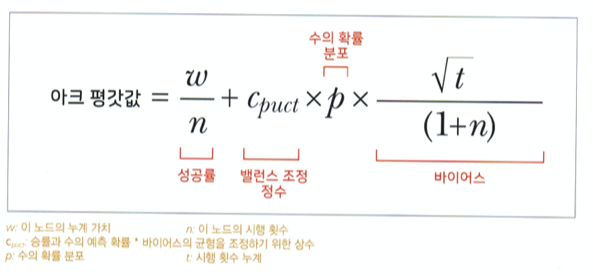

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/mcts_야크평가값.png')


## 평가
- 몬테카를로 트리 탐색에서는 리프 노드 도달시, 플레이아웃으로 가치를 취득했다
- 알파제로는 뉴럴 네트워크를 통해서 정책과 가치를 취득
  - 정책은 아크 평가값으로 계산
  - 가치는 누계 가치의 갱신에 이용

# 전개
- 몬테카를로 트리 탐색에서는 노드의 시행횟수가 10 이상이 되면 전개를 수행하여 자식 노드를 생성
- 알파제로에서는 뉴럴 네트워크를 사용하기 때문에 여러 차례 시뮬레이션을 하지 않아도, 어느 수가 유효한지 추론할 수 있다 -> 1회면 된다

# 갱신

- 가치를 취득 했다면
  - 가치를 기반하여 노드의 정보 누계 가치와 시행횟수를 갱신하면서 루느 노드까지 돌아온다
  - 정책 가치 몬테카를로 트리 탐색 (Policy Value Monte Carlo Tree Search, PV MCTS)
    - 뉴럴 네트워크의 정책과 가치를 사용해 몬테카를로 트리 탐색을 수행하는 방법
  - 비동기 정책 가치 몬테카를로 트리 탐색 (Asynchronous Policy Value Monte Carlo Tree Search, APV MCTS)
    - 오리지널 알파제로

In [ ]:
import numpy as np
x = np.array([[0]*9,[0]*9])
x, x.shape

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]), (2, 9))

In [ ]:
x.reshape(2,3,3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

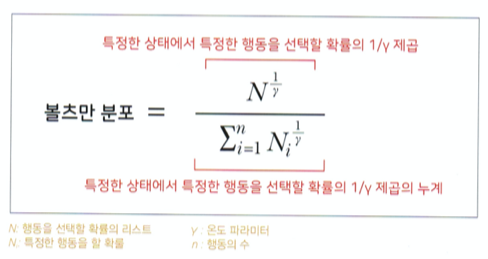

In [ ]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/mcts_볼츠만분포에따른분산.png')

In [ ]:
# pv_mcts.py 업로드
from google.colab import files
uploaded = files.upload()

Saving pv_mcts.py to pv_mcts.py


In [ ]:
# 폴더 확인
!dir

drive  pv_mcts.py  sample_data


In [ ]:
!python dual_network.py

2020-08-05 11:27:32.542717: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-05 11:27:34.014381: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-05 11:27:34.076311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-05 11:27:34.076976: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-08-05 11:27:34.077028: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-05 11:27:34.336516: I tensorflow/stream_executor/platform/default

In [ ]:
# pv_mcts.py 동작 확인
!python pv_mcts.py

2020-08-05 11:27:46.236738: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-05 11:27:47.780223: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-05 11:27:47.814407: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-05 11:27:47.815032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-08-05 11:27:47.815081: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-05 11:27:47.816781: I tensorflow/stream_executor/platform/default